In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from numpy.linalg import svd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

In [ ]:
# 1- قراءة صورة Grayscale
img = color.rgb2gray(io.imread("/content/WhatsApp Image 2025-08-19 at 11.01.16_a87008a1.jpg"))   # ضع أي صورة هنا
n, m = img.shape
print(f"Image shape: {n} x {m}")

Image shape: 168 x 300


In [ ]:
# 2- تطبيق SVD
U, S, VT = svd(img, full_matrices=False)   # SVD: A = U Σ V^T

In [ ]:
# 3- تقليل الأبعاد (اختيار Z قيم مفردة فقط)
Z = 50   # عدد القيم المختارة
A = U[:, :Z]               # n x Z
B = np.diag(S[:Z])         # Z x Z
C = VT[:Z, :]              # Z x m

In [ ]:
# إعادة بناء الصورة باستخدام Z الجديد
img_reconstructed = A @ B @ C

In [ ]:
# 4- توليد A′, B′, C′, Znew (لو اخترنا Z أصغر مثلاً)
Z_new = 20   # أبعاد جديدة أصغر
A_dash = U[:, :Z_new]
B_dash = np.diag(S[:Z_new])
C_dash = VT[:Z_new, :]
img_reconstructed_new = A_dash @ B_dash @ C_dash

In [ ]:
# 5- مقارنة Z و Znew بالـ distances
# هنا هنقارن القيم المفردة S الأصلية مع القيم بعد التقليل
Z_vector = S[:Z].reshape(1, -1)
Znew_vector = S[:Z_new].reshape(1, -1)

In [ ]:
cos_sim = cosine_similarity(Z_vector[:, :Z_new], Znew_vector)[0][0]
eucl_dist = euclidean(Z_vector[:, :Z_new].flatten(), Znew_vector.flatten())

print(f"Cosine Similarity: {cos_sim:.4f}")
print(f"Euclidean Distance: {eucl_dist:.4f}")

Cosine Similarity: 1.0000
Euclidean Distance: 0.0000


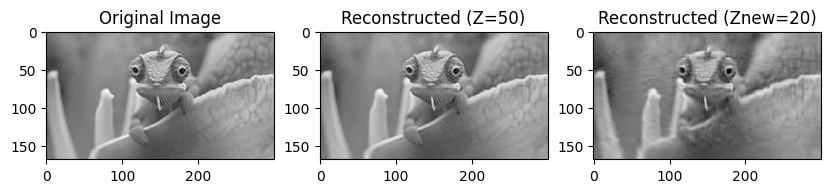

In [ ]:
# عرض الصور
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.title(f"Reconstructed (Z={Z})")
plt.imshow(img_reconstructed, cmap="gray")

plt.subplot(1,3,3)
plt.title(f"Reconstructed (Znew={Z_new})")
plt.imshow(img_reconstructed_new, cmap="gray")

plt.show()